In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import tensorflow as tf
from tensorflow import python
from tensorflow import metrics

import warnings
warnings.filterwarnings('ignore')

# np.random.seed(1)
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv(r'./dataset/air_quality_data_fix.csv')

In [ ]:
df.head()

,latitude,longitude,dateTime,regionCode,universal_aqi,universal_aqi_category,dominant_pollutant,co,no2,o3,...,pm25,so2,health_general_population,health_elderly,health_lung_disease,health_heart_disease,health_athletes,health_pregnant_women,health_children,City
0,-7.294524,112.732623,2024-11-24T08:00:00Z,id,26,Low air quality,pm25,488.99,18.79,84.07,...,89.18,4.21,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
1,-7.296518,112.639345,2024-11-24T08:00:00Z,id,19,Poor air quality,pm25,489.34,8.71,89.47,...,113.85,5.66,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
2,-7.251514,112.759883,2024-11-24T08:00:00Z,id,38,Low air quality,o3,492.09,16.41,78.74,...,45.67,3.64,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
3,-7.283691,112.745216,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,489.48,14.84,82.55,...,75.29,3.98,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
4,-7.262437,112.721854,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,491.03,16.86,82.08,...,75.09,4.18,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   latitude                   4503 non-null   float64
 1   longitude                  4503 non-null   float64
 2   dateTime                   4503 non-null   object 
 3   regionCode                 4503 non-null   object 
 4   universal_aqi              4503 non-null   int64  
 5   universal_aqi_category     4503 non-null   object 
 6   dominant_pollutant         4503 non-null   object 
 7   co                         4503 non-null   float64
 8   no2                        4503 non-null   float64
 9   o3                         4503 non-null   float64
 10  pm10                       4503 non-null   float64
 11  pm25                       4503 non-null   float64
 12  so2                        4503 non-null   float64
 13  health_general_population  4503 non-null   objec

In [ ]:
df.describe()

,latitude,longitude,universal_aqi,co,no2,o3,pm10,pm25,so2
count,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000
mean,-6.172113,111.775917,48.390406,921.874146,21.486798,27.489749,57.500497,44.125661,6.226664
std,2.388965,3.465874,20.060225,557.484904,14.804054,23.486928,30.726596,27.601220,5.741531
min,-8.699974,105.702027,19.000000,141.100000,0.460000,0.960000,6.750000,5.150000,0.130000
25%,-7.315119,107.611239,34.000000,490.580000,10.230000,9.405000,22.435000,16.110000,2.420000
50%,-7.222618,112.723456,38.000000,863.540000,16.750000,24.000000,62.250000,47.980000,4.370000
75%,-6.176544,113.887644,70.000000,1211.935000,35.195000,31.220000,85.005000,62.040000,7.210000
max,-0.400059,117.199712,91.000000,2096.430000,52.040000,89.470000,116.240000,113.850000,25.260000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['co', 'no2', 'o3', 'pm10','pm25','so2']]
y = df['universal_aqi']

In [ ]:
# Pastikan y diubah menjadi array numpy sebelum reshape
y = y.values.reshape(-1, 1)

# Normalisasi data menggunakan MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)


In [ ]:
# 5. Mengubah data menjadi bentuk sekuensial untuk RNN/LSTM (samples, timesteps, features)
timesteps = 5  # Menggunakan 5 timestep sebelumnya untuk prediksi
X_seq, y_seq = [], []
for i in range(len(X) - timesteps):
    X_seq.append(X[i:i + timesteps])
    y_seq.append(y[i + timesteps])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [ ]:
# 6. Membagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)


In [ ]:
# Menambahkan callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrik yang dipantau
    patience=10,         # Jumlah epoch tanpa peningkatan sebelum berhenti
    restore_best_weights=True  # Mengembalikan bobot terbaik
)

In [ ]:
# 9. Membuat model LSTM
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
lstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh', input_shape=(timesteps, X_seq.shape[2]))),
    Dropout(0.2),
    LSTM(64, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Melatih model LSTM dengan EarlyStopping
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,  # Maksimal epoch
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Tambahkan EarlyStopping di sini
)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0824 - mae: 0.1945 - val_loss: 0.0048 - val_mae: 0.0488
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mae: 0.0516 - val_loss: 0.0046 - val_mae: 0.0471
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046 - mae: 0.0473 - val_loss: 0.0053 - val_mae: 0.0532
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - mae: 0.0482 - val_loss: 0.0054 - val_mae: 0.0544
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - mae: 0.0480 - val_loss: 0.0053 - val_mae: 0.0545
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - mae: 0.0476 - val_loss: 0.0045 - val_mae: 0.0463
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mae: 0.0458 - val_loss: 0.0045 - val_mae: 0.0477
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038 - mae: 0.0449 - val_loss: 0.0045 - val_mae: 0.0457
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mae

In [ ]:
# 11. Mengevaluasi model
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mae: 0.0434


In [ ]:
# 12. Menampilkan hasil evaluasi
results = {
    'LSTM': {'Loss': lstm_loss, 'MAE': lstm_mae}
}

print("Hasil Evaluasi Model:")
print(results)

Hasil Evaluasi Model:
{'LSTM': {'Loss': 0.003847952000796795, 'MAE': 0.04232171177864075}}


In [ ]:
# Mengevaluasi model
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test)
# Menampilkan akurasi
# Hitung akurasi sebagai 1 - Normalized MAE
y_test_inv = scaler_y.inverse_transform(y_test)  # Kembalikan skala asli untuk interpretasi
mae_lstm_scaled = scaler_y.inverse_transform([[lstm_mae]])[0][0]  # MAE LSTM dalam skala asli
accuracy_lstm = (1 - (mae_lstm_scaled / np.mean(y_test_inv))) * 100  # Akurasi LSTM dalam persentase

# Menampilkan hasil
print("Hasil Evaluasi Model:")
print(f"LSTM - Loss (MSE): {lstm_loss:.4f}, MAE: {lstm_mae:.4f}, Akurasi: {accuracy_lstm:.2f}%")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mae: 0.0434
Hasil Evaluasi Model:
LSTM - Loss (MSE): 0.0038, MAE: 0.0423, Akurasi: 54.70%


In [ ]:
# Mengevaluasi model
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test)

# Hitung akurasi dalam skala 0-1
# 1 - Normalized MAE
normalized_lstm_mae = lstm_mae / np.mean(y_test)  # Normalisasi MAE LSTM
accuracy_lstm = 1 - normalized_lstm_mae

# Menampilkan hasil
print("Hasil Evaluasi Model:")
print(f"LSTM - Loss (MSE): {lstm_loss:.4f}, MAE: {lstm_mae:.4f}, Akurasi: {accuracy_lstm:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0434
Hasil Evaluasi Model:
LSTM - Loss (MSE): 0.0038, MAE: 0.0423, Akurasi: 0.8973


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluasi model pada data uji
y_pred_test = lstm_model.predict(X_test)

# Inverse transform hasil prediksi dan data aktual
y_pred_test_scaled = scaler_y.inverse_transform(y_pred_test)
y_test_scaled = scaler_y.inverse_transform(y_test)

# Hitung akurasi menggunakan metrik MAE dan MSE
mae = mean_absolute_error(y_test_scaled, y_pred_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_test_scaled)
accuracy = 1 - (mae / np.mean(y_test_scaled))  # Akurasi dalam skala 0-1

# Tampilkan akurasi
print(f"Akurasi Model (skala 0-1): {accuracy:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Ambil 3 input terakhir dari data uji
last_inputs = X_test[-3:]  # Mengambil 3 input terakhir
predictions = []

for _ in range(3):  # Prediksi 3 hari ke depan
    # Prediksi untuk setiap timestep
    current_input = last_inputs[-1]  # Gunakan input terakhir untuk prediksi
    prediction = lstm_model.predict(current_input.reshape(1, current_input.shape[0], current_input.shape[1]))
    predictions.append(prediction[0, 0])

    # Update input: Tambahkan prediksi terbaru sebagai langkah berikutnya
    prediction_reshaped = np.full((1, current_input.shape[1]), prediction[0, 0])  # Sesuaikan dengan fitur
    next_input = np.vstack([current_input[1:], prediction_reshaped])  # Geser dan tambahkan prediksi
    last_inputs = np.append(last_inputs[1:], [next_input], axis=0)  # Update 3 input terakhir

# Inverse transform hasil prediksi untuk kembali ke skala asli
predictions_scaled = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1))

# Output prediksi 3 hari ke depan
print("\nPrediksi 3 Hari ke Depan:")
for i, pred in enumerate(predictions_scaled.flatten(), 1):
    print(f"Hari ke-{i}: {pred:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Akurasi Model (skala 0-1): 0.9374
Mean Absolute Error (MAE): 3.0472
Mean Squared Error (MSE): 19.9478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Prediksi 3 Hari ke Depan:
Hari ke-1: 73.3370
Hari ke-2: 37.5702
Hari ke-3: 44.4057


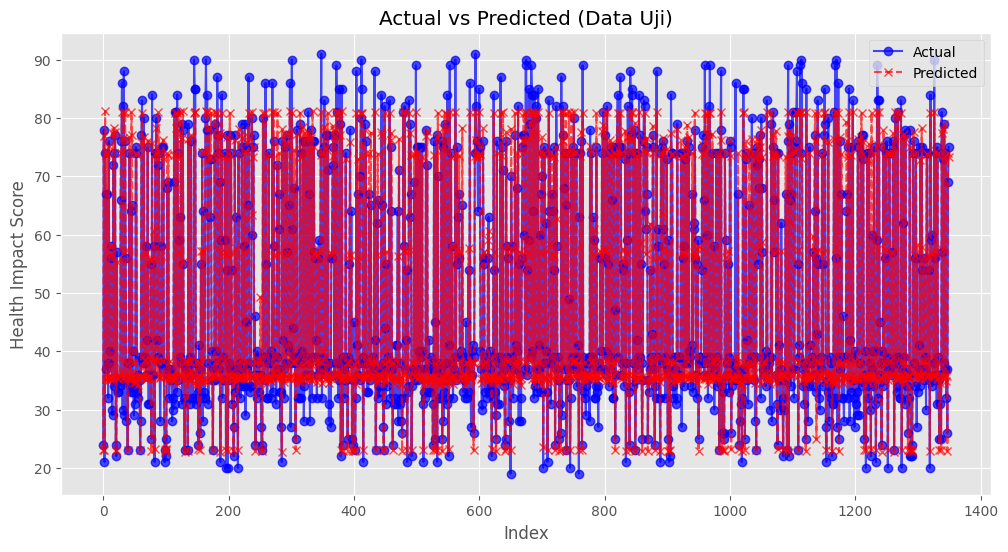

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi vs data aktual untuk data uji
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(y_test_scaled.flatten(), label="Actual", color="blue", linestyle="-", marker="o", alpha=0.7)
# Plot data prediksi
plt.plot(y_pred_test_scaled.flatten(), label="Predicted", color="red", linestyle="--", marker="x", alpha=0.7)

# Tambahkan detail pada grafik
plt.title("Actual vs Predicted (Data Uji)")
plt.xlabel("Index")
plt.ylabel("Health Impact Score")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


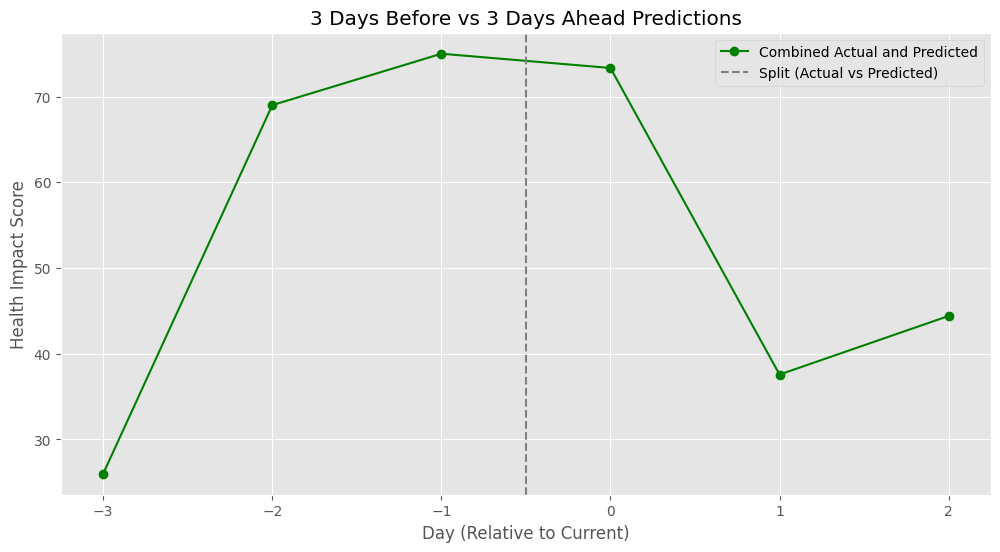

In [ ]:
# Fix the dimensions issue by ensuring `days` and `combined_values` have the same length

# Dummy data for demonstration (Replace with actual values)
# Assuming the last 3 actual values from y_test_scaled represent the 3 days before prediction
last_3_actual = y_test_scaled[-3:].flatten()  # Replace with the last 3 actual values
predicted_3_days = predictions_scaled.flatten()  # Replace with actual predictions for 3 days ahead

# Combine last 3 actual and 3 predicted values
combined_values = np.concatenate((last_3_actual, predicted_3_days))

# Correct `days` to match the length of `combined_values`
days = range(-3, 3)  # 3 days before (-3 to -1) and 3 days ahead (0 to 2)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(days, combined_values, label="Combined Actual and Predicted", linestyle='-', marker='o', color='green')

# Highlight the split between actual and predicted
plt.axvline(x=-0.5, color='gray', linestyle='--', label="Split (Actual vs Predicted)")

# Tambahkan detail pada grafik
plt.title("3 Days Before vs 3 Days Ahead Predictions")
plt.xlabel("Day (Relative to Current)")
plt.ylabel("Health Impact Score")
plt.xticks(days)
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()


In [ ]:
lstm_model.export("LSTMModel")

INFO:tensorflow:Assets written to: LSTMModel\assets


INFO:tensorflow:Assets written to: LSTMModel\assets


Saved artifact at 'LSTMModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2137254765456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137252917904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256714000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256714768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256715344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256716304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256715536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256716688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256717648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256716880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2137256718032: TensorSpec(shape=(), dtype=tf.res